# Tutorial 1: Data cleaning & visualization

---

## Introduction

Welcome!, this tutorial will show you how to clean and visualise apple infrared data

First we import some libraries:

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Reading in data </i></b> 

The following code does the following:
- reads data from an Excel file
- converts the Excel file format into a Pandas dataframe 

In [2]:
df_GD = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GD.xlsx')

<b><i> Examining data </i></b> 

Let's takae a look at the GS apple data

In [3]:
df_GD.head(5)

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GD-ch-bruise1.5h-10a,B,1h,S1,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,GD-ch-bruise1.5h-10b,B,1h,S1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,GD-ch-bruise1.5h-10c,S,1h,S1,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620
3,GD-ch-bruise1.5h-10d,S,1h,S1,-0.110366,-0.110041,-0.109542,-0.109117,-0.108661,-0.108094,...,1.257423,1.262108,1.269531,1.262279,1.243150,1.235391,1.237499,1.246332,1.265530,1.268394
4,GD-ch-bruise1.5h-11a,B,1h,S1,-0.142115,-0.141852,-0.141603,-0.141129,-0.140701,-0.140477,...,0.697953,0.696903,0.699350,0.704406,0.707838,0.709304,0.710684,0.711052,0.707295,0.703002


In [7]:
df_GD.shape

(547, 2078)

---

<b><i> Cleaning data </i></b> 

First, let us change the column names, because wavelength values are more relatable than wavenumbers.

In [14]:
wavenumbers = np.float_(df_GD.columns[4:])
wavelengths = (1/wavenumbers)*10**7 # changing the wavenumber to a wave length
print("\nThis waveNum ("+str(wavenumbers[0])+") should change to this("+ str(wavelengths[0]) + ") waveLength\n")

df_GD.columns.values[4:] = np.round(wavelengths, 3) # getting just up to 3 decimal numbers
df_GD.head(4)


This waveNum (11995.485) should change to this(833.646993014455) waveLength



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GD-ch-bruise1.5h-10a,B,1h,S1,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,GD-ch-bruise1.5h-10b,B,1h,S1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,GD-ch-bruise1.5h-10c,S,1h,S1,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620
3,GD-ch-bruise1.5h-10d,S,1h,S1,-0.110366,-0.110041,-0.109542,-0.109117,-0.108661,-0.108094,...,1.257423,1.262108,1.269531,1.262279,1.243150,1.235391,1.237499,1.246332,1.265530,1.268394


now let us check the labels

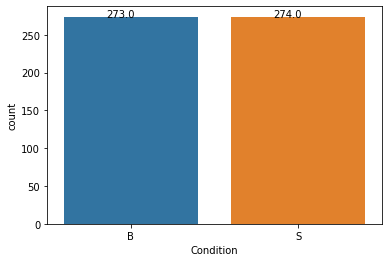

In [15]:
ax = sns.countplot(x="Condition",data=df_GD)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Now we are done cleaning the data

---

<b><i> Getting the inputs and the outputs </i></b> 

In [31]:
# input
df_input_GD = df_GD.iloc[:, 4: ]
df_input_GD.head(3)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,-0.080449,-0.080576,-0.080701,-0.080221,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,-0.152880,-0.152913,-0.152769,-0.152251,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,-0.063074,-0.062996,-0.062877,-0.062301,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620


In [32]:
#output
y_GD = df_GD['Condition']

---

<b><i>  Visualising the data (before standardization)<b><i> 

First we get 50 random indices

In [35]:
n = 50
rand  = np.random.randint(len(y_GD), size= n)
rand # those are the indices to the apple samples that we will print

array([109, 179, 157, 381, 454, 267, 275, 323, 489, 160, 498, 407, 269,
       277, 289, 309, 163,  70, 276, 354, 520, 313, 517, 432, 135, 318,
       262, 415, 146, 247, 379, 506, 545, 389, 161, 358, 380, 166, 228,
       264, 354, 295, 295, 204, 221, 147, 117,  17, 176, 395])

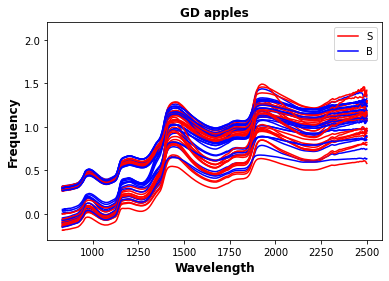

In [37]:
plt.figure(figsize=(6, 4))
S_Flag = True
B_Flag = True
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GD.iloc[i]).flatten()
    
    if y_GD[i] == 'S':
        if S_Flag:
            plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'red', label = "S") # plotting the good apples
            S_Flag = False
        plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'red') # plotting the good apples
    if y_GD[i] == 'B':
        if B_Flag == True:
            plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'blue', label = "B") # plotting the good apples
            B_Flag = False
        plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'blue') # plotting the bad apples
    # plt.ylim(-1, 2)
    
plt.title("GD apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength", fontweight ='bold', fontsize =12)
plt.ylabel("Frequency", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

<b><i> Standard Scaler </i></b> 

In [24]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
input_scaled_GD = scaler.fit_transform(df_input_GD)

df_input_GD = pd.DataFrame(input_scaled_GD, columns = df_input_GD.columns)
# df_input_scaled['class'] = df['Condition']

df_input_GD

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.731725,-0.730176,-0.728727,-0.727461,-0.726642,-0.725518,-0.724313,-0.725130,-0.725457,-0.723712,...,0.546056,0.574183,0.579372,0.526487,0.460490,0.443868,0.446451,0.415474,0.390292,0.485206
1,-1.091111,-1.092839,-1.093328,-1.092337,-1.090818,-1.089728,-1.089482,-1.089551,-1.088223,-1.086292,...,-1.292529,-1.288633,-1.289674,-1.279227,-1.254336,-1.253172,-1.262276,-1.249641,-1.248508,-1.277802
2,-0.645740,-0.645299,-0.643366,-0.641336,-0.639719,-0.638135,-0.636717,-0.636566,-0.635741,-0.633507,...,1.475302,1.522985,1.580512,1.583641,1.490876,1.385676,1.359118,1.489694,1.745120,1.845467
3,-0.868533,-0.868143,-0.866378,-0.865521,-0.864794,-0.862983,-0.861361,-0.861849,-0.862523,-0.861921,...,0.738139,0.753778,0.776696,0.740737,0.663161,0.640581,0.659312,0.697421,0.773504,0.788531
4,-1.027988,-1.027977,-1.027624,-1.026741,-1.026286,-1.026253,-1.025533,-1.024548,-1.023454,-1.022714,...,-1.477221,-1.479322,-1.463297,-1.435875,-1.420067,-1.422083,-1.425940,-1.426095,-1.437950,-1.456115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.189975,-0.190901,-0.190235,-0.189389,-0.191424,-0.195746,-0.197555,-0.195286,-0.192623,-0.192692,...,0.367447,0.273551,0.263806,0.307068,0.286683,0.230939,0.209507,0.245654,0.369018,0.516014
543,-0.253723,-0.253582,-0.256496,-0.259383,-0.259734,-0.260837,-0.264524,-0.265279,-0.261194,-0.256631,...,-0.996738,-1.013982,-1.006576,-0.966727,-0.919994,-0.905660,-0.915580,-0.931365,-0.958646,-0.990852
544,-0.053975,-0.055295,-0.058111,-0.060912,-0.062198,-0.063607,-0.063761,-0.061905,-0.059853,-0.057656,...,0.475311,0.441656,0.425435,0.439938,0.400322,0.325418,0.342025,0.418953,0.416168,0.386331
545,-0.327951,-0.330562,-0.332937,-0.334624,-0.336659,-0.337866,-0.336044,-0.332283,-0.328306,-0.326333,...,-0.571854,-0.564302,-0.555436,-0.583571,-0.631514,-0.665160,-0.652100,-0.570231,-0.459750,-0.430918


---

<b><i> Data visualisation (after standardization) </i></b > 

we will use the same 50 random samples

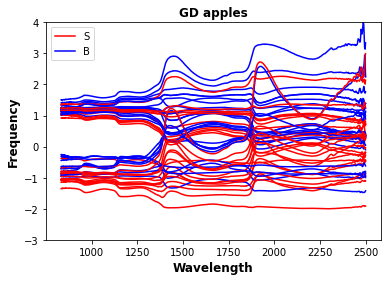

In [30]:
plt.figure(figsize=(6, 4))
S_Flag = True
B_Flag = True
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GD.iloc[i]).flatten()
    
    if y_GD[i] == 'S':
        if S_Flag:
            plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'red', label = "S") # plotting the good apples
            S_Flag = False
        plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'red') # plotting the good apples
    if y_GD[i] == 'B':
        if B_Flag == True:
            plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'blue', label = "B") # plotting the good apples
            B_Flag = False
        plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'blue') # plotting the bad apples
    
plt.title("GD apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength", fontweight ='bold', fontsize =12)
plt.ylabel("Frequency", fontweight ='bold', fontsize =12)
plt.ylim([-3,4])
plt.legend()

plt.show()

---

<b><i> store the data <b><i>

In [16]:
%store  df_input_GD
%store  y_GD
%store  df_GD

Stored 'df_input_GD' (DataFrame)
Stored 'y_GD' (Series)
Stored 'df_GD' (DataFrame)
